# Final Project Macine Learning
## Team Limits
>Anggota Kelompok:
* Alfian Kafilah Ba'its (120140109)
* Anisa Prasetya (120140087)
* Muhammad Duta Faturrahman (120140065)

# Latar Belakang

>Pemalsuan tanda tangan di lingkungan akademis dapat menyebabkan konsekuensi hukum yang serius dan mampu merugikan reputasi akademik serta kepercayaan secara hukum. Mahasiswa yang melakukan pemalsuan tanda tangan yang dilakukan dengan cara menyalin ataupun melakukan peniruan penanda pada suatu dokumen tentunya dapat mengakibatkan permasalahan yang fatal dalam proses verifikasi dan legalisasi.  Apabila terdapat mahasiswa yang melakukan pemalsuan tanda tangan, tentunya mereka dapat menghadapi masalah disipliner dan etika yang dapat memengaruhi masa depan pendidikan mereka. Hal ini menekankan perlunya sebuah sistem untuk mengenali dan memverifikasi tanda tangan untuk mencegah pemalsuan.



>Solusi yang diusulkan adalah sistem pengenalan tanda tangan yang dibangun menggunakan metode Deep Learning menggunakan Convolutional Neural Network (CNN). dipilih karena hasilnya yang signifikan dalam pengenalan gambar dan kemampuannya untuk meniru korteks visual manusia. Sistem ini dapat mendeteksi dan mengenali objek dalam gambar digital, sehingga cocok untuk verifikasi tanda tangan.

# Apa itu hand written signature verification?
>**Handwritten Signature Verification, atau Verifikasi Tanda Tangan, adalah proses memeriksa keaslian tanda tangan seseorang untuk memastikan apakah itu benar-benar dibuat oleh individu tersebut atau tidak**.  Tanda tangan digital yang sudah disimpan dalam format data dapat digunakan untuk verifikasi tanda tangan. Tanda tangan tangan adalah salah satu atribut personal yang paling umum diterima untuk verifikasi identitas, baik itu untuk perbankan atau bisnis.

 Dalam proses ini, sistem dapat membandingkan tanda tangan yang diajukan dengan contoh tanda tangan yang sudah terdaftar atau dikenal sebelumnya untuk menentukan tingkat kesamaannya. Hal ini membantu **mengurangi risiko pemalsuan atau penipuan dalam situasi di mana identitas seseorang harus diverifikasi melalui tanda tangan mereka.**

 ![link text](https://miro.medium.com/max/1150/0*CSOpSnaOK0BHL__c)

#Import Library

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
from glob import glob
import matplotlib.image as img
import zipfile
from tensorflow.keras.callbacks import EarlyStopping

#Prepare Dataset

>Dataset yang digunakan pada project kali ini ialah diambil melalui website **Kaggle**. Dalam dataset ini, terdapat nomor direktori atau nama pengguna dan
diklasifikasikan menjadi dua jenis, yaitu:

Folder berisikan tanda tangan asli dan folder berisikan tanda tangan palsu. (Terbagi menjadi 2 folder).
Berikut ini contoh penggambarannya:

 >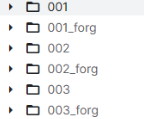

## Download Dataset melalui Kaggle API

> Untuk melakukan download dataset melalui Kaggle API, maka pengguna harus melakukan **Create New Token** melalui akun Kaggle dibagian setting. Setelah itu, terdapat **file** yang telah didownload yang bernama **kaggle.json**
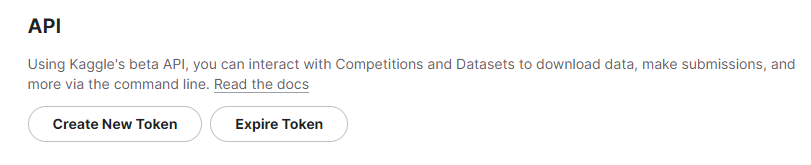

>**Setelah itu**, **upload** file **kaggle.json** pada google colab. Berikut ini contoh file yang telah diupload.
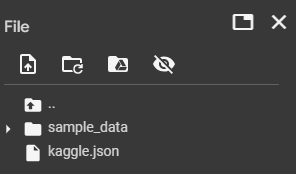

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!rm -rf data

In [ ]:
! kaggle datasets list

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                DAIGT V2 Train Dataset                              29MB  2023-11-16 01:38:36            949        109  1.0              
muhammadbinimran/housing-price-prediction-data                 Housing Price Prediction Data                      763KB  2023-11-21 17:56:32           3433         74  1.0              
carlmcbrideellis/llm-7-prompt-training-dataset                 LLM: 7 prompt training dataset                      41MB  2023-11-15 07:32:56           1343        105  1.0              
thedrcat/daigt-proper-train-dataset                            DAIGT P

In [ ]:
!kaggle datasets download -d robinreni/signature-verification-dataset

100% 600M/601M [00:32<00:00, 22.0MB/s]
100% 601M/601M [00:32<00:00, 19.4MB/s]


#Extract Zip File

In [ ]:
local_zip = 'signature-verification-dataset.zip'
target_extraction = '/content/data/'
file_check = "dataset"

try:
    if os.path.exists(os.path.join(target_extraction, file_check)):
        print("File Already Extracted")
    else:
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall(target_extraction)

except FileNotFoundError:
    print('Zip File Not Found!')

# Display Image (Visualization of Forge and Real Sign)

Text(0.5, 1.0, 'Forge')

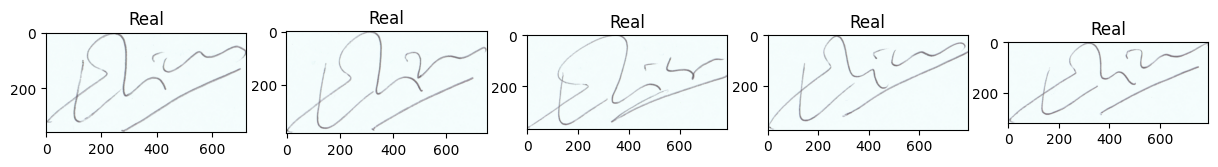

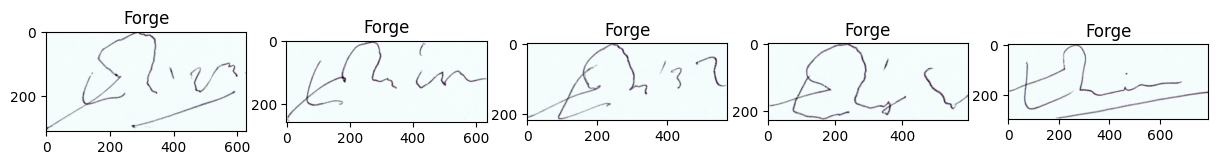

In [ ]:
import skimage.io as sk
from skimage import img_as_ubyte
from skimage.io import imread

image1 = sk.imread("/content/data/sign_data/train/001/001_01.PNG")
image2 = sk.imread("/content/data/sign_data/train/001/001_02.PNG")
image3 = sk.imread("/content/data/sign_data/train/001/001_03.PNG")
image4 = sk.imread("/content/data/sign_data/train/001/001_04.PNG")
image5 = sk.imread("/content/data/sign_data/train/001/001_05.PNG")

fig, ax = plt.subplots(1,5, figsize = (15,10))

ax[0].imshow(image1)
ax[0].set_title("Real")
ax[1].imshow(image2)
ax[1].set_title("Real")
ax[2].imshow(image3)
ax[2].set_title("Real")
ax[3].imshow(image4)
ax[3].set_title("Real")
ax[4].imshow(image5)
ax[4].set_title("Real")

image6 = sk.imread("/content/data/sign_data/train/001_forg/0119001_01.png")
image7 = sk.imread("/content/data/sign_data/train/001_forg/0119001_02.png")
image8 = sk.imread("/content/data/sign_data/train/001_forg/0119001_03.png")
image9 = sk.imread("/content/data/sign_data/train/001_forg/0119001_04.png")
image10 = sk.imread("/content/data/sign_data/train/001_forg/0201001_01.png")

fig, ax1 = plt.subplots(1,5, figsize = (15,10))

ax1[0].imshow(image6)
ax1[0].set_title("Forge")
ax1[1].imshow(image7)
ax1[1].set_title("Forge")
ax1[2].imshow(image8)
ax1[2].set_title("Forge")
ax1[3].imshow(image9)
ax1[3].set_title("Forge")
ax1[4].imshow(image10)
ax1[4].set_title("Forge")

# Split Dataset

In [ ]:
train_dir="/content/data/sign_data/train/"
test_dir="/content/data/sign_data/test"

# Preprocessing Data

In [ ]:
SIZE = 224

In [ ]:
import cv2
import os
import glob

train_data = []
train_labels = []

for per in os.listdir('/content/data/sign_data/train/'):
    for data in glob.glob('/content/data/sign_data/train/'+per+'/*.*'):
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []

for per in os.listdir('/content/data/sign_data/test/'):
    for data in glob.glob('/content/data/sign_data/test/'+per+'/*.*'):
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)

In [ ]:
train_data.shape

(1649, 1, 224, 224, 3)

In [ ]:
train_data = train_data.reshape(-1, SIZE,SIZE, 3)
test_data = test_data.reshape(-1, SIZE,SIZE, 3)

In [ ]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)
test_data,test_labels = shuffle(test_data,test_labels)

# Architecture

In [ ]:
# model = Sequential()

# ## Conv layer 1
# model.add(Conv2D(32, (3,3), activation='relu', input_shape=(Image_Width,Image_Height, Image_Channel)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# ## Conv layer 2
# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# ## Conv layer 3
# model.add(Conv2D(128, (3,3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# ## Conv layer 4
# model.add(Conv2D(256, (3,3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# ## Conv layer 5
# model.add(Conv2D(256, (3,3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# ## Conv layer 6
# model.add(Conv2D(512, (3,3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(256,activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(2, activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3))),
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu')),
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu')),

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 16)      4624      
                                                                 
 flatten (Flatten)           (None, 760384)            0         
                                                                 
 dense (Dense)               (None, 128)               97329280  
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 97339250 (371.32 MB)
Trainable params: 973

In [ ]:
learning_rate = 0.001

model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adamax(learning_rate=learning_rate),
                  metrics=['accuracy'])

# Set Callback
> ## Apa itu Callback??
* Pada TensorFlow, "callback" merujuk pada fungsi atau objek yang dapat disertakan selama pelatihan model untuk memberikan berbagai tindakan atau respons pada berbagai titik dalam siklus pelatihan. Callbacks sering digunakan untuk memantau kinerja model, menghentikan pelatihan jika suatu kondisi terpenuhi, atau melakukan tindakan khusus lainnya pada setiap epoch atau iterasi pelatihan.
* Pada project kali ini, callback yang digunakan ialah apabila proses pelatihan telah mempunyai akurasi sebesar 97%, maka pelatihan akan dihentikan secara otomatis.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') >= 0.97:
                print("\nReached 97% accuracy so cancelling training!")
                self.model.stop_training = True

callbacks = myCallback()

# Training Model

In [ ]:
history = model.fit(train_data,train_labels, batch_size=64,epochs=30,validation_split=.3, callbacks=[callbacks])

Epoch 1/30
 6/19 [========>.....................] - ETA: 2s - loss: 19.9636 - accuracy: 0.4870

19/19 [==============================] - 23s 373ms/step - loss: 7.3172 - accuracy: 0.4688 - val_loss: 0.6928 - val_accuracy: 0.5313
Epoch 2/30
19/19 [==============================] - 3s 174ms/step - loss: 0.6995 - accuracy: 0.5355 - val_loss: 0.6962 - val_accuracy: 0.5313
Epoch 3/30
19/19 [==============================] - 4s 195ms/step - loss: 0.6928 - accuracy: 0.5286 - val_loss: 0.6861 - val_accuracy: 0.5313
Epoch 4/30
19/19 [==============================] - 4s 200ms/step - loss: 0.6780 - accuracy: 0.5407 - val_loss: 0.6766 - val_accuracy: 0.5313
Epoch 5/30
19/19 [==============================] - 3s 182ms/step - loss: 0.6681 - accuracy: 0.5407 - val_loss: 0.6659 - val_accuracy: 0.5313
Epoch 6/30
19/19 [==============================] - 3s 180ms/step - loss: 0.6497 - accuracy: 0.5407 - val_loss: 0.6485 - val_accuracy: 0.5313
Epoch 7/30
19/19 [==============================] - 3s 180ms/step - loss: 0.6332 - accuracy: 0.5407 - val_loss: 0.6341 - val_accuracy: 0.5313
Epoch 8/30
19/19

Text(0.5, 1.0, 'Training Loss')

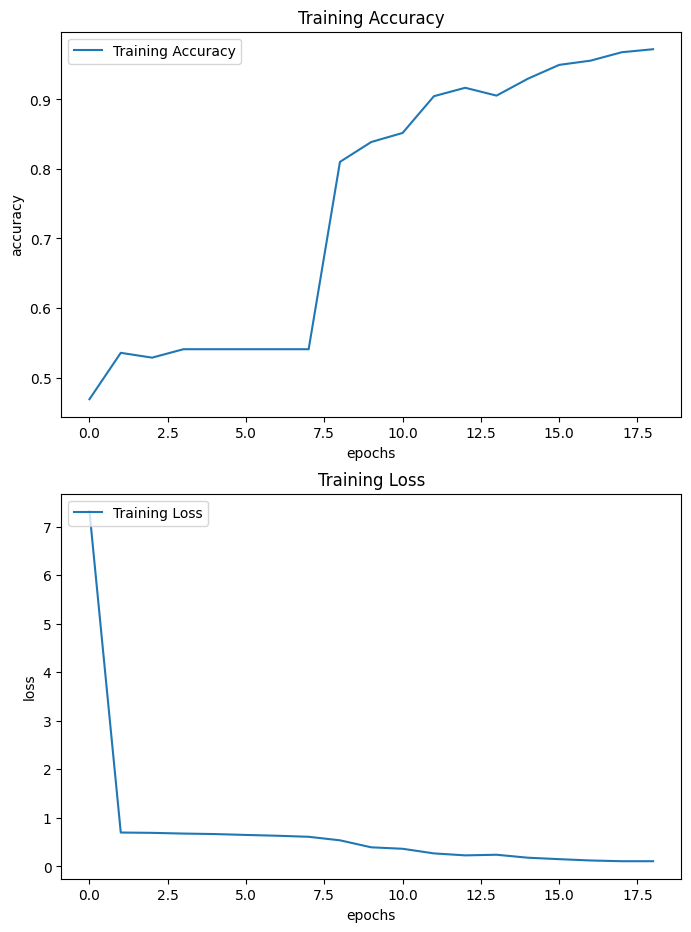

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(8, 11))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.title('Training Loss')

# Model Evaluate

> Fungsi dari model evaluate adalah untuk mengevaluasi kinerja model pembelajaran mesin. Model evaluate dapat digunakan untuk mengukur berbagai aspek kinerja model, seperti akurasi, presisi, recall, dan F1-score. Model evaluate dapat digunakan untuk membandingkan kinerja model yang berbeda atau untuk mengevaluasi kinerja model.



In [ ]:
pred = model.predict(test_data)

16/16 [==============================] - 0s 25ms/step


In [ ]:
test_labels

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(pred,axis=1), test_labels)

0.968

## Confussion Matrix
> Confusion Matrix adalah pengukuran performa untuk masalah klasifikasi machine learning dimana keluaran dapat berupa dua kelas atau lebih.  Confusion Matrix adalah tabel dengan 4 kombinasi berbeda dari nilai prediksi dan nilai aktual. Ada empat istilah yang merupakan representasi hasil proses klasifikasi pada confusion matrix yaitu True Positif, True Negatif, False Positif, dan False Negatif.

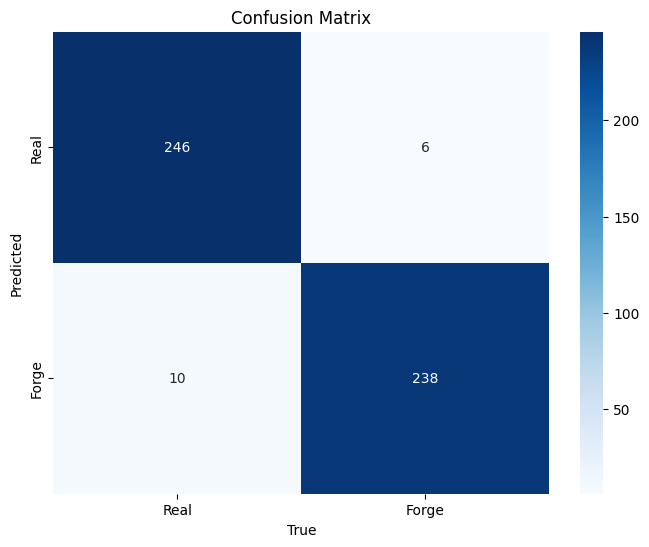

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predicted labels
predicted_labels = np.argmax(pred, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Forge'],
            yticklabels=['Real', 'Forge'])
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


>Confusion matrix tersebut menunjukkan hasil evaluasi performa suatu model klasifikasi. Berikut ini hasil dari Confussion Matrix dari model yang telah dilatih:
* True Positive (TP): 246
* False Positive (FP): 6
* True Negative (TN): 238
* False Negative (FN): 10

Kesimpulan dari Confussion Matrix:
> * Model berhasil mengklasifikasikan **"Real"** sebanyak 246 benar (True Positives), dan hanya 10 salah (False Negatives).
* Model berhasil mengklasifikasikan **"Forge"** sebanyak 238 benar (True Negatives), dan hanya 6 salah (False Positives).


## Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

predicted_labels = np.argmax(pred, axis=1)
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print(classification_report(test_labels, predicted_labels))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       252
           1       0.98      0.96      0.97       248

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500




>Fungsi dari classification report adalah untuk mengevaluasi kinerja model klasifikasi. Classification report memberikan informasi tentang akurasi, presisi, recall, dan F1-score dari model.
* Akurasi: Ini adalah rasio dari jumlah data yang diprediksi dengan benar terhadap total jumlah data.
* Presisi: Ini adalah rasio dari jumlah data yang diprediksi dengan benar sebagai positif terhadap total jumlah data yang diprediksi sebagai positif.
* Recall: Ini adalah rasio dari jumlah data yang diprediksi dengan benar sebagai positif terhadap total jumlah data yang sebenarnya positif.
* F1-score: Ini adalah kombinasi dari presisi dan recall, dan adalah rata-rata dari keduanya.

**Classification report** dapat digunakan untuk membandingkan kinerja model yang berbeda atau untuk mengevaluasi kinerja model selama waktu.

# Checking Forgery or Genuine (Palsu atau Asli)

In [ ]:
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

def preprocess_image(image_path):

    image = Image.open(image_path)

    target_size = (224, 224)
    image = image.resize(target_size)
    return np.array(image)

image_path = '/content/data/sign_data/test/049_forg/01_0114049.PNG'

preprocessed_image = preprocess_image(image_path)
preprocessed_image = np.expand_dims(preprocessed_image, axis=0)

pred = model.predict(preprocessed_image)
predicted_labels = np.argmax(pred, axis=1)
class_labels = {0: 'Real', 1: 'Forge'}
predicted_class = class_labels[predicted_labels[0]]
print(f'The model predicts the image at {image_path} as: {predicted_class}')


1/1 [==============================] - 0s 462ms/step
The model predicts the image at /content/data/sign_data/test/049_forg/01_0114049.PNG as: Forge


>Pada proses pengecekan, didapati model memprediksi bahwa tanda tangan tersebut bersifat palsu. Hasil prediksi tersebut benar dan sesuai *ground-truth*

# Save Model Into H5
>File .h5 pada dasarnya berguna sebagai wadah yang komprehensif untuk menyimpan semua informasi yang diperlukan terkait dengan model machine learning, sehingga memudahkan pengguna untuk menyimpan, memuat, dan berbagi model mereka dengan mudah

In [ ]:
model.save('my_model_new.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Kesimpulan
Sebuah model yang dapat mempelajari tanda tangan dan memprediksi apakah tanda tangan tersebut palsu atau tidak telah berhasil diimplementasikan. Model ini dapat diaplikasikan di berbagai aspek di mana tanda tangan manual digunakan untuk persetujuan atau otentikasi.
Implementasi model ini di berbagai aspek tentunya memiliki potensi untuk meningkatkan keamanan dan efisiensi.

> * Keamanan: Model ini dapat membantu mencegah pemalsuan tanda tangan, yang dapat digunakan untuk melakukan penipuan atau penyalahgunaan.
* Efisiensi: Model ini dapat membantu mempercepat proses persetujuan atau otentikasi dokumen, karena tidak perlu lagi dilakukan pemeriksaan manual oleh petugas.